In [1]:
#rerun kernel if CSV data not going 
##import packages 
import numpy as np 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

#opening filepath and file_obj
filepath='CTD.csv'
file_obj= pd.read_csv(filepath,na_values = 'nd')

sites= file_obj['site']
file_obj.columns

Index(['site', 'cast_time_PST', 'cast_time_UTC', 'time_zone', 'depth_0_tide',
       'latitude', 'longitude', 'location', 'timeJ', 'timeH', 'timeM', 'timeS',
       'scan', 'depth', 'pressure', 'temperature', 'conductivity', 'salinity',
       'density', 'oxygen', 'oxygen2', 'fluorescence', 'par_sat_log',
       'turbidity', 'depth2', 'density2', 'salinity2', 'flag'],
      dtype='object')

In [2]:
# sites 2018
eksite= file_obj.loc[file_obj['site']=='EK']
eosite = file_obj.loc[file_obj['site']=='EO']

#sites 2019
oksite= file_obj.loc[file_obj['site']=='OK']
oosite= file_obj.loc[file_obj['site']=='OO']

In [3]:

#time 2018
ekpst= file_obj.loc[file_obj['site']=='EK', 'cast_time_PST']
eopst=  file_obj.loc[file_obj['site']=='EO', 'cast_time_PST']

#time 2019
okpst= file_obj.loc[file_obj['site']=='OK', 'cast_time_PST']
oopst=  file_obj.loc[file_obj['site']=='OO', 'cast_time_PST']

#getting dates into datetime
ekpst= pd.to_datetime(ekpst)
eopst= pd.to_datetime(eopst)
okpst=pd.to_datetime(okpst)
oopst= pd.to_datetime(oopst)

In [4]:
#oxygen 2018
eko2= eksite['oxygen']
eoo2= eosite['oxygen']

#oxygen 2019
oko2= oksite['oxygen']
ooo2= oosite['oxygen']



In [5]:
#turbidity 2018
ekturb= eksite['turbidity']
eoturb= eosite['turbidity']
#turbidity 2019
okturb= oksite['turbidity']
ooturb= oosite['turbidity']

In [6]:
#fluorescence 2018
ekf= eksite['fluorescence']
eof= eosite['fluorescence']

#fluorescence 2019
okf= oksite['fluorescence']
oof= oosite['fluorescence']


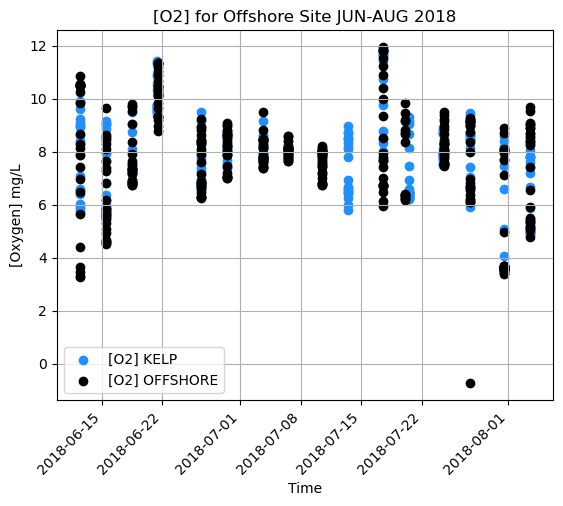

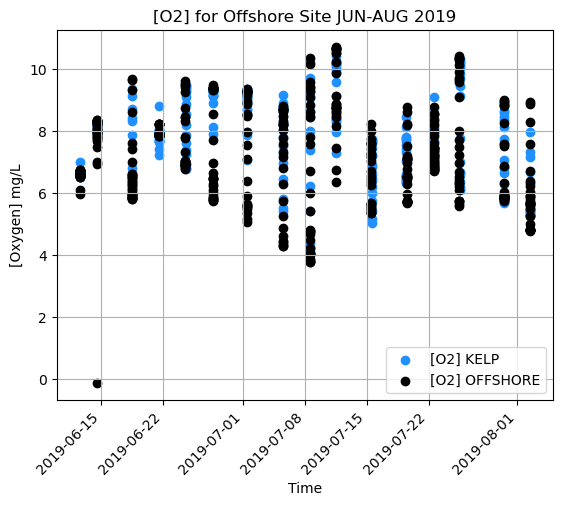

In [7]:
#oxygen 2018 graph

fig,(axs)= plt.subplots()
axs=plt.gca()
axs.scatter(ekpst, eko2, c='dodgerblue',label='[O2] KELP')
axs.scatter(eopst, eoo2, c='black', label= '[O2] OFFSHORE')
#used https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels as a reference to rotate x axis values 
plt.xticks(rotation=45, ha='right')
axs.legend(loc='lower left')
axs.set_ylabel('[Oxygen] mg/L')
axs.set_xlabel('Time')
axs.set_title('[O2] for Offshore Site JUN-AUG 2018')
axs.grid()

#oxygen 2019 graph 

fig,(axs)= plt.subplots()
axs=plt.gca()
axs.scatter(okpst, oko2, c='dodgerblue',label= '[O2] KELP')
axs.scatter(oopst, ooo2, c='black',label= '[O2] OFFSHORE')
#used https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels as a reference to rotate x axis values 
plt.xticks(rotation=45, ha='right')
axs.set_ylabel('[Oxygen] mg/L')
axs.set_xlabel('Time')
axs.set_title('[O2] for Offshore Site JUN-AUG 2019')
axs.legend(loc='lower right')
axs.grid()

(0.0, 8.0)

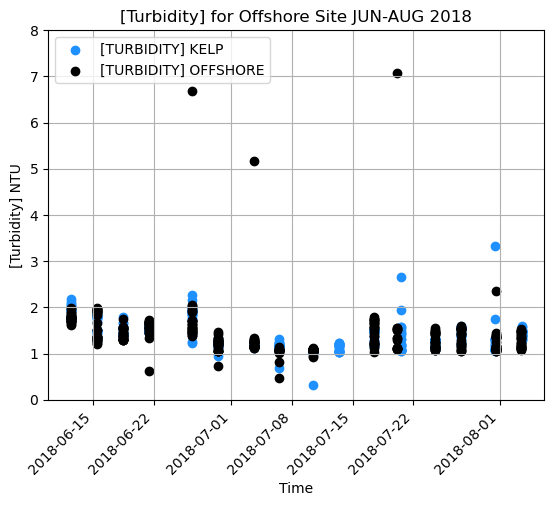

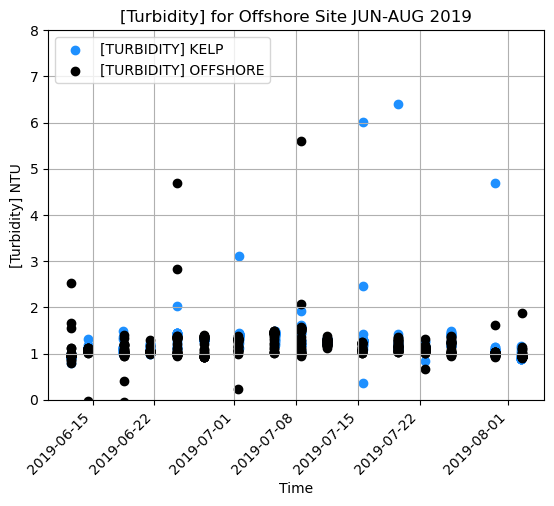

In [8]:
#turbidity 2018 graph

fig,(axs)= plt.subplots()
axs=plt.gca()
axs.scatter(ekpst, ekturb, c='dodgerblue',label='[TURBIDITY] KELP')
axs.scatter(eopst, eoturb, c='black', label= '[TURBIDITY] OFFSHORE')
#used https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels as a reference to rotate x axis values 
plt.xticks(rotation=45, ha='right')
axs.legend(loc='upper left')
axs.set_ylabel('[Turbidity] NTU')
axs.set_xlabel('Time')
axs.set_title('[Turbidity] for Offshore Site JUN-AUG 2018')
axs.grid()
axs.set_ylim([0,8])
#turbidity 2019 graph 

fig,(axs)= plt.subplots()
axs=plt.gca()
axs.scatter(okpst, okturb, c='dodgerblue',label= '[TURBIDITY] KELP')
axs.scatter(oopst, ooturb, c='black',label= '[TURBIDITY] OFFSHORE')
#used https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels as a reference to rotate x axis values 
plt.xticks(rotation=45, ha='right')
axs.set_ylabel('[Turbidity] NTU')
axs.set_xlabel('Time')
axs.set_title('[Turbidity] for Offshore Site JUN-AUG 2019')
axs.legend(loc='upper left')
axs.grid()
axs.set_ylim([0,8])

(0.0, 4.0)

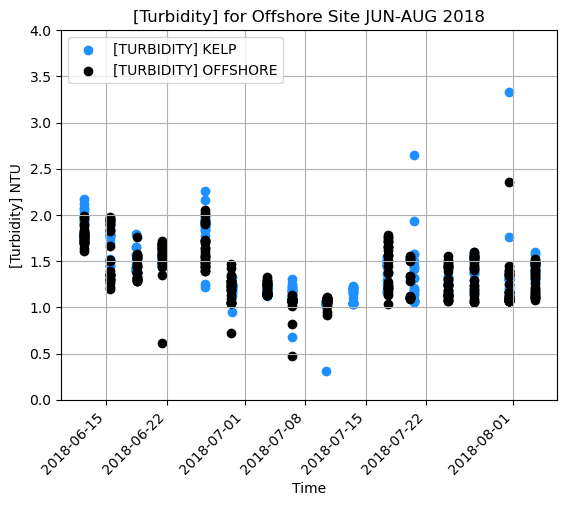

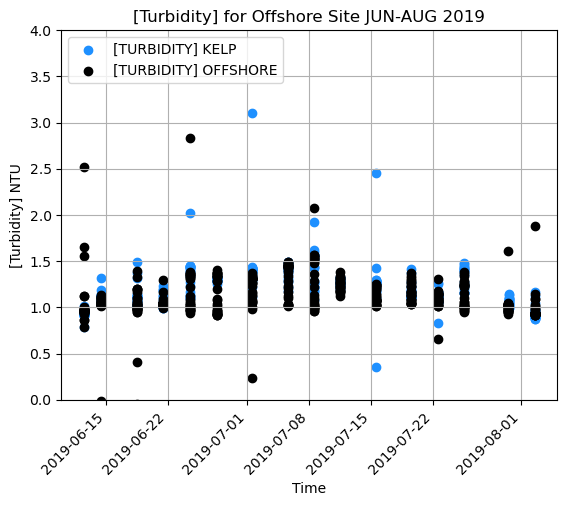

In [9]:
## turbidity zoom in

#turbidity 2018 graph

fig,(axs)= plt.subplots()
axs=plt.gca()
axs.scatter(ekpst, ekturb, c='dodgerblue',label='[TURBIDITY] KELP')
axs.scatter(eopst, eoturb, c='black', label= '[TURBIDITY] OFFSHORE')
#used https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels as a reference to rotate x axis values 
plt.xticks(rotation=45, ha='right')
axs.legend(loc='upper left')
axs.set_ylabel('[Turbidity] NTU')
axs.set_xlabel('Time')
axs.set_title('[Turbidity] for Offshore Site JUN-AUG 2018')
axs.grid()
axs.set_ylim([0,4])
#turbidity 2019 graph 

fig,(axs)= plt.subplots()
axs=plt.gca()
axs.scatter(okpst, okturb, c='dodgerblue',label= '[TURBIDITY] KELP')
axs.scatter(oopst, ooturb, c='black',label= '[TURBIDITY] OFFSHORE')
#used https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels as a reference to rotate x axis values 
plt.xticks(rotation=45, ha='right')
axs.set_ylabel('[Turbidity] NTU')
axs.set_xlabel('Time')
axs.set_title('[Turbidity] for Offshore Site JUN-AUG 2019')
axs.legend(loc='upper left')
axs.grid()
axs.set_ylim([0,4])

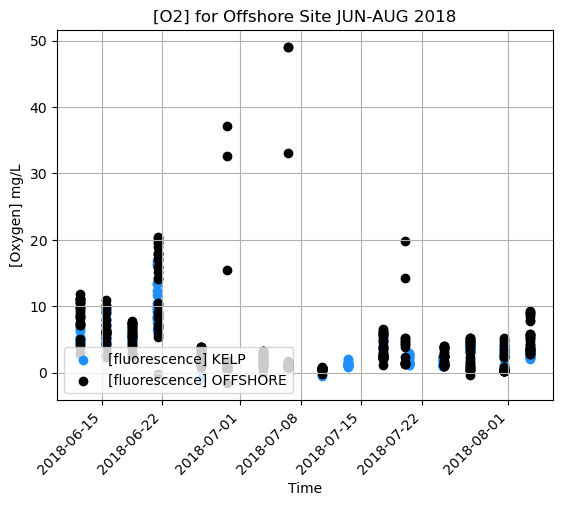

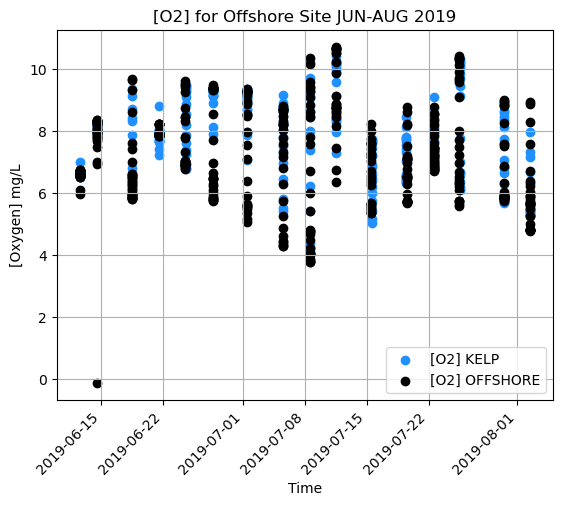

In [10]:
#fluorescence graph 2018


fig,(axs)= plt.subplots()
axs=plt.gca()
axs.scatter(ekpst, ekf, c='dodgerblue',label='[fluorescence] KELP')
axs.scatter(eopst, eof, c='black', label= '[fluorescence] OFFSHORE')
#used https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels as a reference to rotate x axis values 
plt.xticks(rotation=45, ha='right')
axs.legend(loc='lower left')
axs.set_ylabel('[Oxygen] mg/L')
axs.set_xlabel('Time')
axs.set_title('[O2] for Offshore Site JUN-AUG 2018')
axs.grid()

#fluorescence graph 2019

fig,(axs)= plt.subplots()
axs=plt.gca()
axs.scatter(okpst, oko2, c='dodgerblue',label= '[O2] KELP')
axs.scatter(oopst, ooo2, c='black',label= '[O2] OFFSHORE')
#used https://stackoverflow.com/questions/10998621/rotate-axis-tick-labels as a reference to rotate x axis values 
plt.xticks(rotation=45, ha='right')
axs.set_ylabel('[Oxygen] mg/L')
axs.set_xlabel('Time')
axs.set_title('[O2] for Offshore Site JUN-AUG 2019')
axs.legend(loc='lower right')
axs.grid()